# Benford's Law intuition

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Define two alternative functions to find the first figure of a number to check which is more efficient

In [2]:
def findfirstdigit1(x):
    for i in range(8,-1,-1):
        q = x // 10**i
        if q >= 1:
            break
    return q

def findfirstdigit2(x):
    return int(str(x)[0])    

In [3]:
tic = time.time()
for i in range(1000000):
    findfirstdigit1(np.random.randint(1,999999999))
print(time.time() - tic)

tic = time.time()
for i in range(1000000):
    findfirstdigit2(np.random.randint(1,999999999))
print(time.time() - tic)

2.819950819015503
2.8354666233062744


The efficiency seems to be pretty similar

Next piece of code will generate 100,000 random numbers taken for a different virtual set each. All virtual sets are normal distributions centred on a random point and with a random standard deviation between 1% and 100%. This simulates the effect of taken many measurements from completely different items. The first figures of all those numbers are recorded, grouped and plotted. The red line shows the theoretical Benford ratio

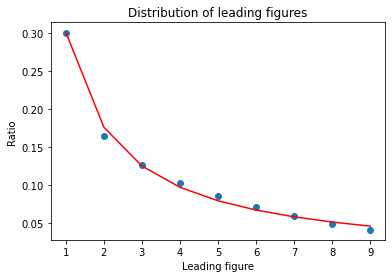

In [4]:
Results = [0,0,0,0,0,0,0,0,0]
Resultstransformed = [0,0,0,0,0,0,0,0,0]
iters = 100000
for iMid in range(iters):
    Mid = np.random.randint(1,99999999) * max(np.random.rand(), 0.1)
    Sdrand = np.random.randint(1,100)
    Sd = Mid * Sdrand / 100
    Measure = max(np.random.normal(Mid, Sd), 1)
    Digit = int(findfirstdigit2(Measure))
    Results[Digit-1]+= 1
x = np.array([1,2,3,4,5,6,7,8,9])
Pcs = np.array(Results) / iters
Pcstransformed = np.array(Resultstransformed) / iters
Ben = np.log10(1 + 1/x)
plt.scatter(x, Pcs)
plt.plot(x, Ben, color='r')
plt.xlabel('Leading figure')
plt.ylabel('Ratio')
plt.title('Distribution of leading figures')
plt.show()

The next script shows 25 random samples of distributions, plotting them along 3 standard deviation around the mean value, and coloring thos values beginning with 1. The number shown in each plot is the ratio of the red area and the total, i.e. the share of numbers in that distribution beginning with 1

### Visualization plots

In [5]:
def countdigits(x):
    return len(str(x))

In [6]:
def nd(x, Mn, Sd):
    return (1/(Sd*(2*np.pi)**0.5)) * np.e**(-0.5*((x-Mn)/Sd)**2)

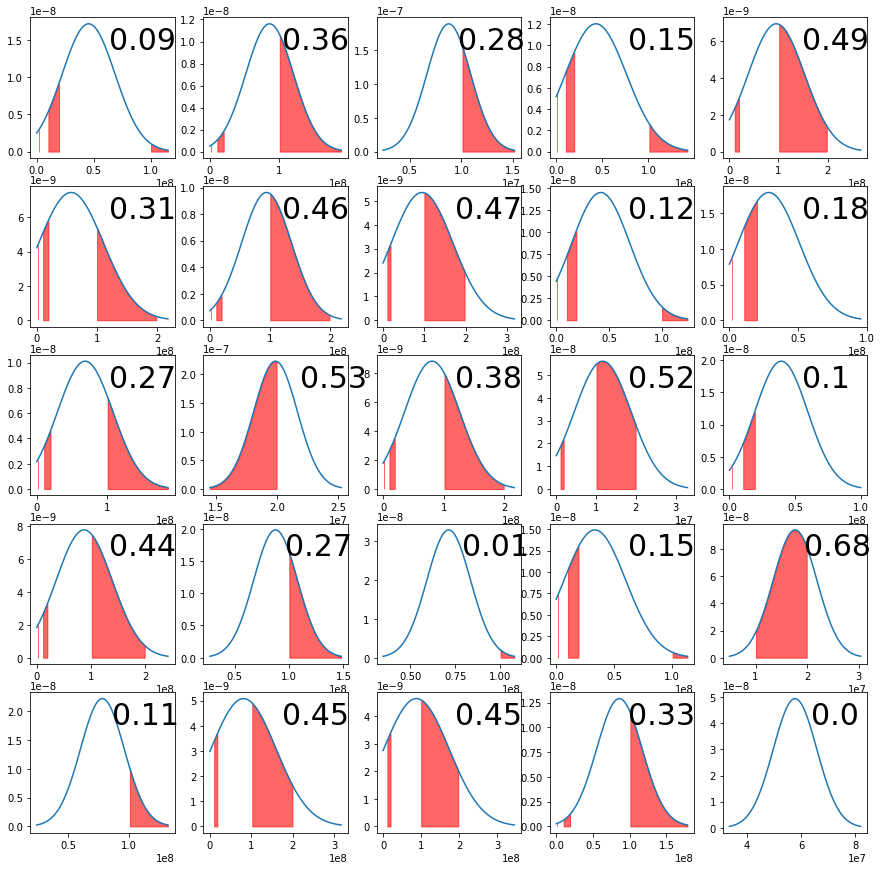

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
for iPlot in range(25):
    xpos = iPlot // 5
    ypos = iPlot % 5
    Mn = np.random.randint(1,99999999)
    Sdpc = np.random.randint(1,100)
    Sd = Mn * Sdpc / 100
    x_min = max(0, round(Mn-3*Sd))
    x_max = round(Mn+3*Sd)
    x = np.linspace(x_min, x_max, 125)
    y = nd(x,Mn,Sd)
    countdigits(x_min)
    countdigits(x_max)
    Orders = range(countdigits(x_min), countdigits(x_max)+1)
    ax[xpos, ypos].plot(x,y)
    Int1 = 0
    for i in Orders:
        ax[xpos,ypos].fill_between(x,y, where = (x >= 10**(i-1)) & (x < 2*10**(i-1)),
                                   color='r', alpha=0.6)
        Int1 = Int1 + integrate.quad(nd, 10**(i-1), 2*10**(i-1), args=(Mn,Sd))[0]
    Inttot = integrate.quad(nd, x_min, x_max, args=(Mn,Sd))
    Pc1 = Int1 / Inttot[0]
    ax[xpos, ypos].annotate(round(Pc1, 2), xy=(0.55*(x_max + x_min), 0.8 * max(y)), size=30)